In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm,poisson,expon,geom,binom
import math

In [ ]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/retail_data.csv?1641285094
df = pd.read_csv('retail_data.csv?1641285094')

--2023-12-12 06:31:58--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 13.35.37.31, 13.35.37.102, 13.35.37.159, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|13.35.37.31|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23027994 (22M) [text/plain]
Saving to: ‘walmart_data.csv?1641285094’

walmart_data.csv?16 100%[===================>]  21.96M  16.8MB/s    in 1.3s    

2023-12-12 06:32:00 (16.8 MB/s) - ‘walmart_data.csv?1641285094’ saved [23027994/23027994]



In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [ ]:
df.describe(include='all')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068,550068,550068,550068.000000,550068,550068,550068.000000,550068.000000,550068.000000
unique,NaN,3631,2,7,NaN,3,5,NaN,NaN,NaN
top,NaN,P00265242,M,26-35,NaN,B,1,NaN,NaN,NaN
freq,NaN,1880,414259,219587,NaN,231173,193821,NaN,NaN,NaN
mean,1.003029e+06,NaN,NaN,NaN,8.076707,NaN,NaN,0.409653,5.404270,9263.968713
std,1.727592e+03,NaN,NaN,NaN,6.522660,NaN,NaN,0.491770,3.936211,5023.065394
min,1.000001e+06,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,1.000000,12.000000
25%,1.001516e+06,NaN,NaN,NaN,2.000000,NaN,NaN,0.000000,1.000000,5823.000000
50%,1.003077e+06,NaN,NaN,NaN,7.000000,NaN,NaN,0.000000,5.000000,8047.000000
75%,1.004478e+06,NaN,NaN,NaN,14.000000,NaN,NaN,1.000000,8.000000,12054.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [ ]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [ ]:
df['Product_Category'].value_counts()

5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: Product_Category, dtype: int64

In [ ]:
IQR=np.percentile(df['Purchase'],75)-np.percentile(df['Purchase'],25)
lw=np.percentile(df['Purchase'],25)-1.5*IQR
uw= np.percentile(df['Purchase'],75) + 1.5*IQR
lw,uw

(-3523.5, 21400.5)

In [ ]:
df.loc[df['Purchase']>21400.5].shape

(2677, 10)

Observations


1.   There are no empty or null values in the dataset.
2.   There are 3631 unique Product Ids and **P00265242** is the most purchased product.
3.   This data contains data of 7 different age groups and most purchases are made by people in the age group 26-35
4.   There are 5891 unique users in this dataset
5.   This dataset contains 21 unique occupations with occupation 4 being the most frequent one.
6. The data point in this dataset belong 3 unique city catagories and most of the customers belong to B city.
7. There are 5 unique values most staying for 1 year.
8. The average purchase amount per bill is 9264
9. The min purchase amount is 12 and max is 23961
10. The range of purchase amount is 23949 which means purchase amount data is spread over a significant range.
11. Median of purchase amount is 8047.
12. Out of 550068 purchases 414259 are made by Male customers, which tells us count of purchases made by Male are greater than Female customers.
13. The upper wisker for the purchase amount data is 21400.5 and lower wisker is negative.
14. There are 2677 outliers in the dataset.
15. There are 20 unique product catagories with 5 being the highest occuring one.

In [ ]:
group=df[['Age','Occupation','Gender','Marital_Status','City_Category']].melt().groupby(['variable','value']).agg({'value':{'count'}})

In [ ]:
df.groupby(['Gender'])['Purchase'].mean()

Gender
F    8734.565765
M    9437.526040
Name: Purchase, dtype: float64

In [ ]:
group['percent']=group[('value','count')]/len(df)
group

value   percent
                       count          
variable       value                  
Age            0-17    15102  0.027455
               18-25   99660  0.181178
               26-35  219587  0.399200
               36-45  110013  0.199999
               46-50   45701  0.083082
               51-55   38501  0.069993
               55+     21504  0.039093
City_Category  A      147720  0.268549
               B      231173  0.420263
               C      171175  0.311189
Gender         F      135809  0.246895
               M      414259  0.753105
Marital_Status 0      324731  0.590347
               1      225337  0.409653
Occupation     0       69638  0.126599
               1       47426  0.086218
               2       26588  0.048336
               3       17650  0.032087
               4       72308  0.131453
               5       12177  0.022137
               6       20355  0.037005
               7       59133  0.107501
               8        1546  0.002811
               9        6291  0.011437
               10      12930  0.023506
               11      11586  0.021063
               12      31179  0.056682
               13       7728  0.014049
               14      27309  0.049647
               15      12165  0.022115
               16      25371  0.046123
               17      40043  0.072796
               18       6622  0.012039
               19       8461  0.015382
               20      33562  0.061014

Observations


1.   25% of the purchases in the dataset are made by Female customers. On average each customer spends 8734.56
2.   75% of purchases are made by Male customers. On average each customer spends 9437.53
3. 40% of the purchases by people in age group 26-35
4. 59% of total purchases are made by unmarried customers.
5. 42% of total purchases are made by people belonging to city catagory A.
6. 13% of total purchases are made by people having occupation 4.

#Univariate

<ipython-input-55-62d4df35c184>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Purchase'],kde=True,ax=axs[0][0]).set_title("Density of Population Spend.")


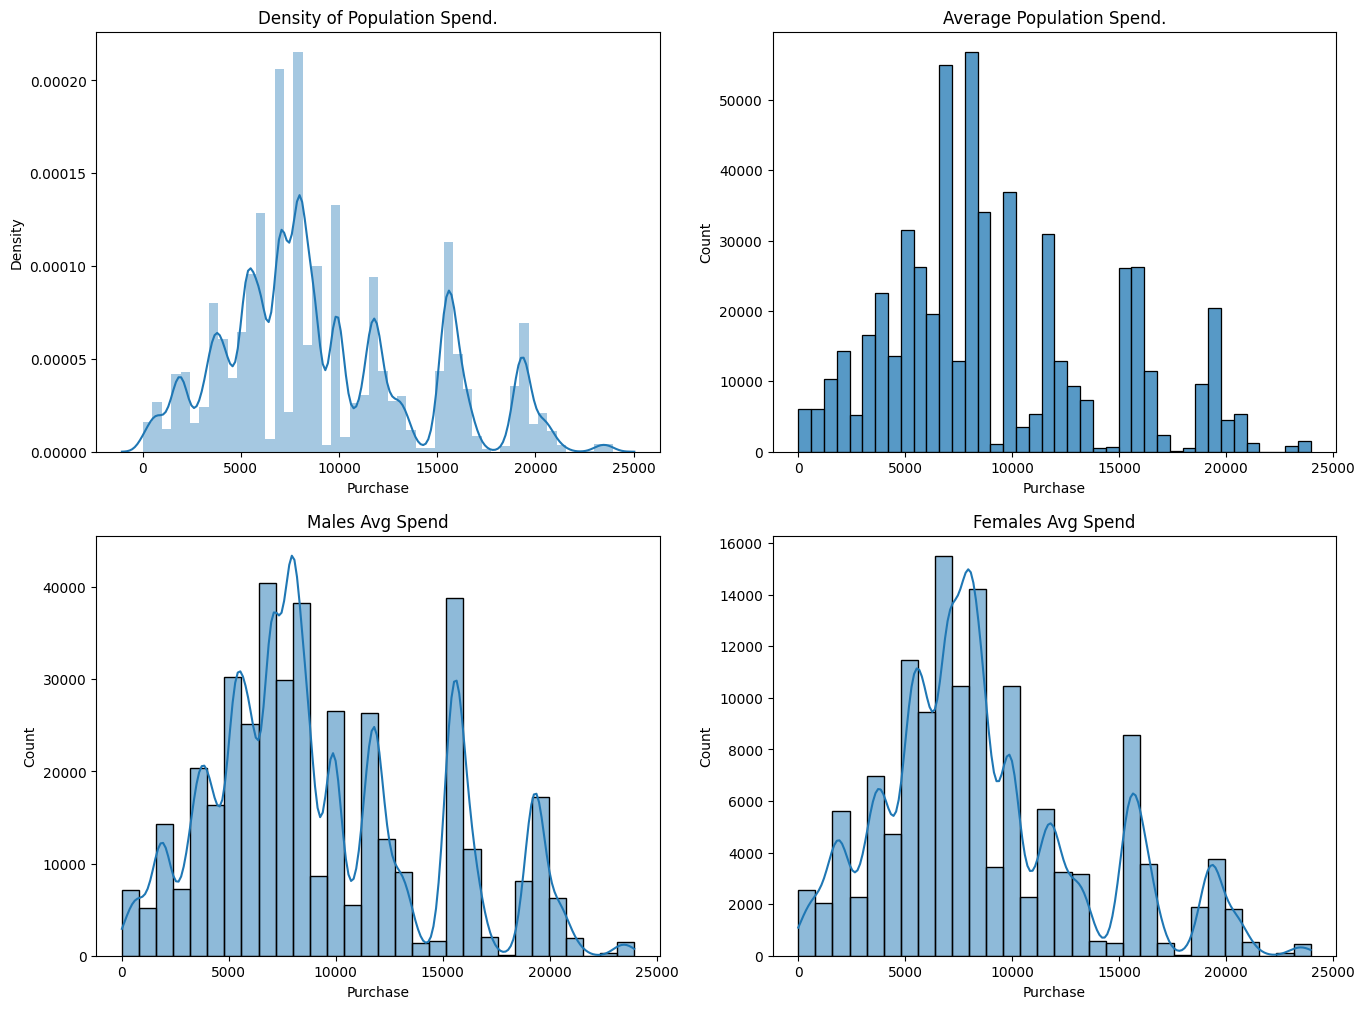

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16,12))
sns.distplot(df['Purchase'],kde=True,ax=axs[0][0]).set_title("Density of Population Spend.")
sns.histplot(df['Purchase'],bins=40,ax=axs[0][1]).set_title("Average Population Spend.")
sns.histplot(df[df['Gender']=='M']['Purchase'],kde=True,bins=30,ax=axs[1][0]).set_title("Males Avg Spend")
sns.histplot(df[df['Gender']=='F']['Purchase'],kde=True,bins=30,ax=axs[1][1]).set_title("Females Avg Spend")
plt.show()

1. Most of the purchases are between the amount 5000 to 12000
2. Most of male purchases are between 8000 to 10500
3. Most of Female purchases are between 7500 to 10000

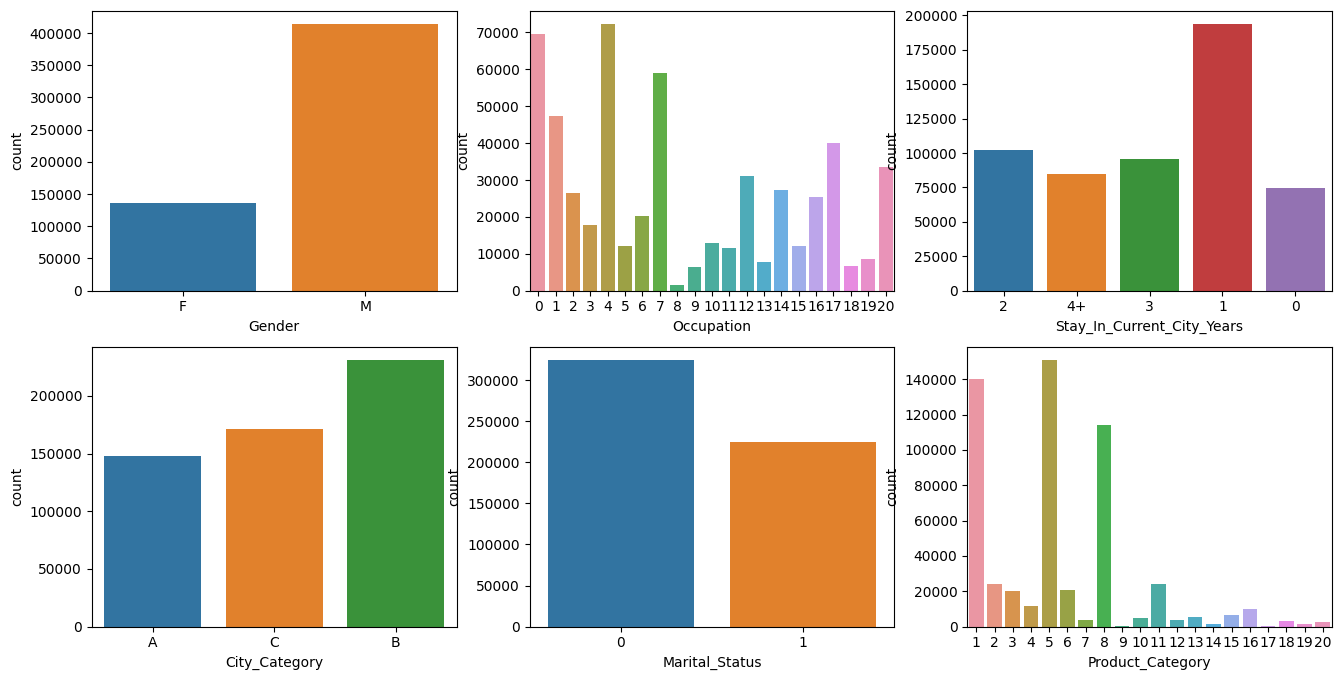

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=3,figsize=(16,8))
sns.countplot(data=df, x='Gender', ax=axs[0,0])
sns.countplot(data=df, x='Occupation', ax=axs[0,1])
sns.countplot(data=df, x='Stay_In_Current_City_Years', ax=axs[0,2])
sns.countplot(data=df, x='City_Category', ax=axs[1,0])
sns.countplot(data=df, x='Marital_Status', ax=axs[1,1])
sns.countplot(data=df, x='Product_Category', ax=axs[1,2])
plt.show()

#Bivariate and Multi-variate

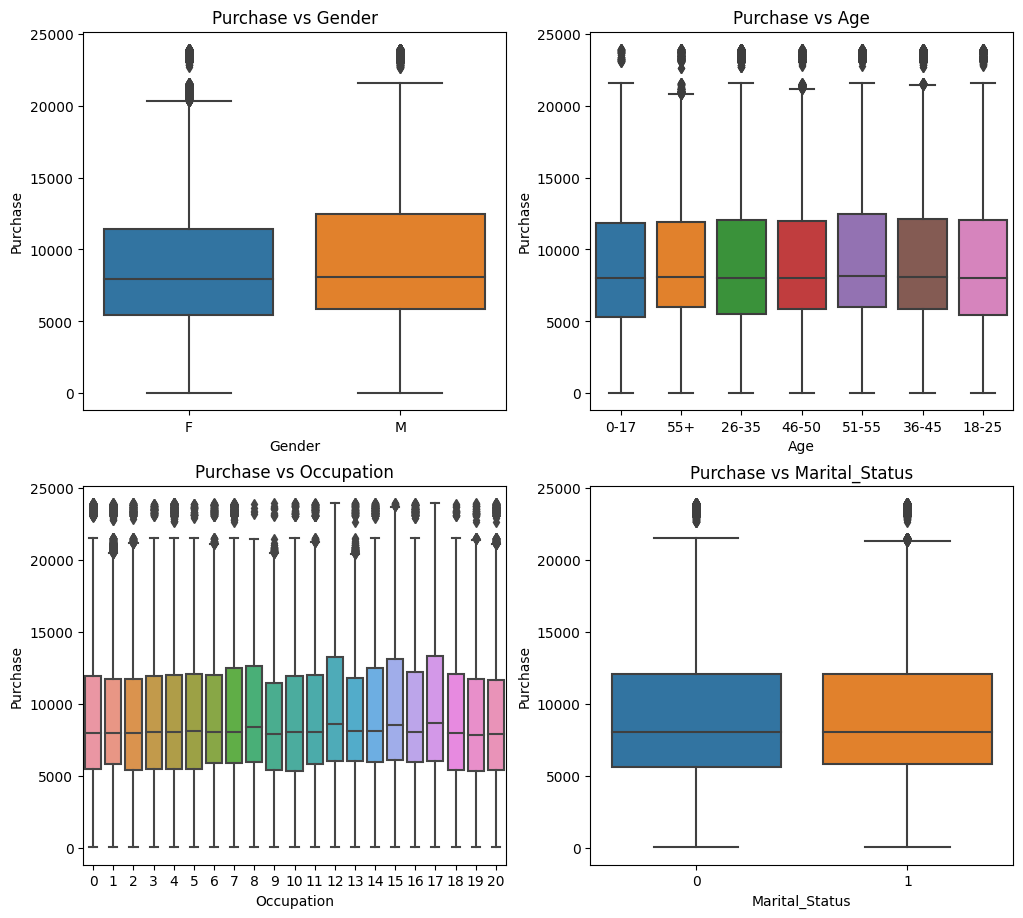

In [ ]:
attr = ['Gender', 'Age', 'Occupation', 'Marital_Status']

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 7))
fig.subplots_adjust(top=1.3)
count = 0
for row in range(2):
    for col in range(2):
        sns.boxplot(data=df, y='Purchase', x=attr[count], ax=axs[row, col],)
        axs[row,col].set_title(f"Purchase vs {attr[count]}")
        count += 1
plt.show()

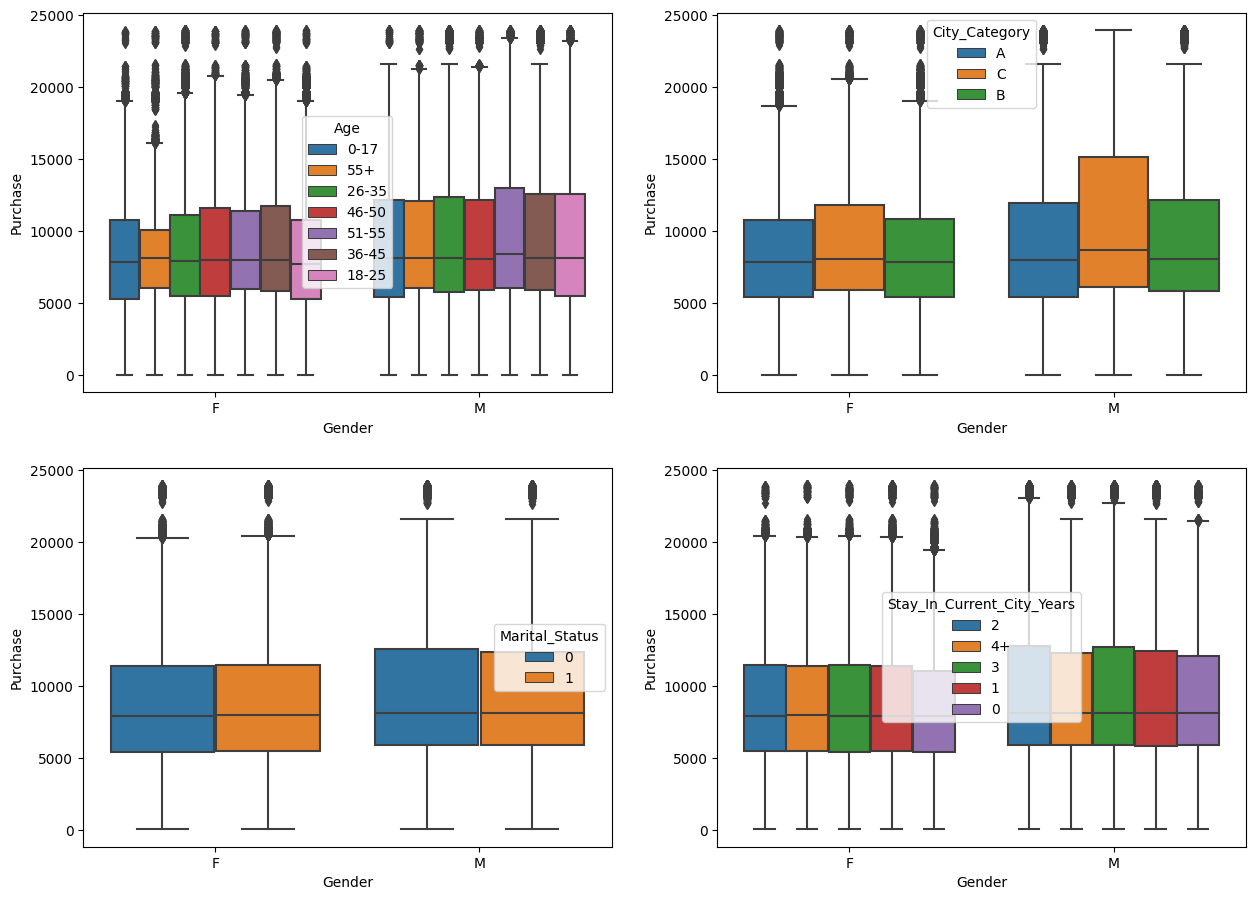

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 6))
fig.subplots_adjust(top=1.5)
sns.boxplot(data=df, y='Purchase', x='Gender', hue='Age', ax=axs[0,0])

sns.boxplot(data=df, y='Purchase', x='Gender', hue='City_Category', ax=axs[0,1])

sns.boxplot(data=df, y='Purchase', x='Gender', hue='Marital_Status', ax=axs[1,0])

sns.boxplot(data=df, y='Purchase', x='Gender', hue='Stay_In_Current_City_Years', ax=axs[1,1])

plt.show()

# Co-Relation & Heatmap

<ipython-input-204-dcc1d3bca88b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True, cmap="Blues")


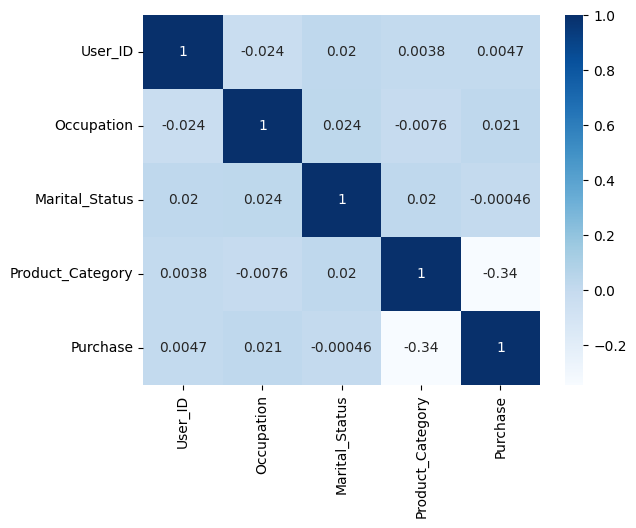

In [ ]:
sns.heatmap(df.corr(),annot=True, cmap="Blues")
plt.show()

#Sample

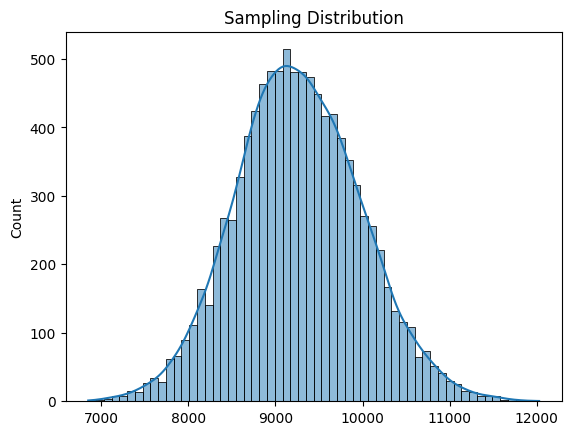

In [ ]:
data_sample=[np.mean(df['Purchase'].sample(50)) for i in range(10000)]
sns.histplot(data_sample,kde=True)
plt.title("Sampling Distribution")
plt.show()

In [ ]:
male_data = df[df['Gender']=='M']
female_data=df[df['Gender']=='F']

In [ ]:
male_sample=[]
female_sample=[]
for i in range(1000):
  sample_m=male_data['Purchase'].sample(1000,replace=True).mean()
  sample_f=female_data['Purchase'].sample(1000,replace=True).mean()
  male_sample.append(sample_m)
  female_sample.append(sample_f)

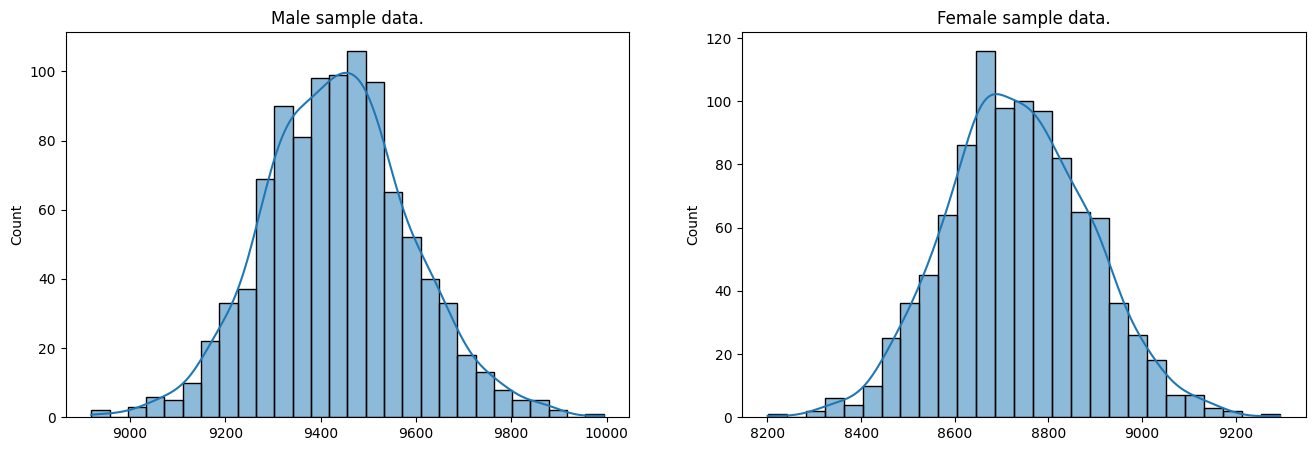

In [ ]:
#Sample Size 1000

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16,5))

sns.histplot(data=male_sample, kde=True,ax=axs[0]).set_title("Male sample data.")
sns.histplot(data=female_sample,kde=True,ax=axs[1]).set_title("Female sample data.")
plt.show()

#Confidence Interval

In [ ]:
def ci(c,sd,m):
  z=norm.ppf(c)
  return (m-(z*sd/math.sqrt(1000)),m+(z*sd/math.sqrt(1000)))


**Gender Based Confidence Interval**

In [ ]:
c1 = .95 # 95% confidence
c2 = .99 #99% confidence
c3 = .90 #90% confidence
male_mean=np.mean(male_sample)
male_sd=np.std(male_sample)

cim1= ci(c1,male_sd,male_mean)
cim2= ci(c2,male_sd,male_mean)
cim3= ci(c3,male_sd,male_mean)

female_mean = np.mean(female_sample)
female_std =np.std(female_sample)

cif1= ci(c1,female_std,female_mean)
cif2= ci(c2,female_std,female_mean)
cif3= ci(c3,female_std,female_mean)

print(cim1,"Male 95% CI")
print(cim2,"Male 99% CI")
print(cim3,"Male 90% CI")
print(cif1,"Female 95% CI")
print(cif2,"Female 99% CI")
print(cif3,"Female 90% CI")

(9428.146962087681, 9444.05452391232) Male 95% CI
(9424.851558870312, 9447.34992712969) Male 99% CI
(9429.90372934896, 9442.297756651042) Male 90% CI
(8726.986551164578, 8742.94617083542) Female 95% CI
(8723.68036366765, 8746.252358332347) Female 99% CI
(8728.749067485387, 8741.18365451461) Female 90% CI



Male Data
1.   If value belongs to [9428.15, 9444.05] interval it is in the 95% confidence Interval.
2.   If value belongs to [9424.85, 9447.35] interval it is in the 99% confidence Interval.
3. If value belongs to [9429.90, 9442.30] interval it is in the 90% confidence Interval.


Female Data
1.   If value belongs to [8726.99, 8742.95] interval it is in the 95% confidence Interval.
2.   If value belongs to [8723.68, 8746.25] interval it is in the 99% confidence Interval.
3. If value belongs to [8728.75, 8741.18] interval it is in the 90% confidence Interval.



There is no overlap between the Male and Female confidence intervals.
We can infer from these confidence intervals that Male spending was higher than Female.

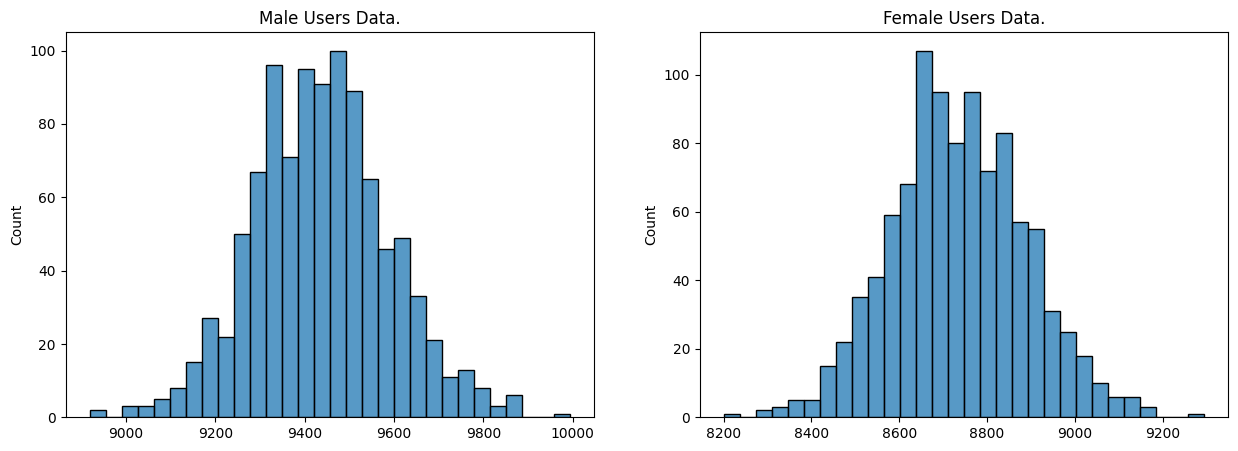

In [ ]:

fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

sns.histplot(male_sample,bins=30,ax=axis[0]).set_title("Male Users Data.")
sns.histplot(female_sample,bins=30,ax=axis[1]).set_title("Female Users Data.")

plt.show()


**Married vs Unmarried Confidence Interval**

In [ ]:
avg_Marital = df.groupby(['User_ID', 'Marital_Status'])[['Purchase']].sum()
avg_Marital = avg_Marital.reset_index()

In [ ]:
sample_size = 1000
num_repitions = 1000
married_means = []
unmarried_means = []

for i in range(num_repitions):
    avg_married = avg_Marital[avg_Marital['Marital_Status']==1].sample(sample_size, replace=True)['Purchase'].mean()
    avg_unmarried = avg_Marital[avg_Marital['Marital_Status']==0].sample(sample_size, replace=True)['Purchase'].mean()

    married_means.append(avg_married)
    unmarried_means.append(avg_unmarried)

In [ ]:
c1 = .95 # 95% confidence
c2 = .99 #99% confidence
c3 = .90 #90% confidence
unmarried_mean=np.mean(unmarried_means)
unmarried_sd=np.std(unmarried_means)

cim1= ci(c1,unmarried_sd,unmarried_mean)
cim2= ci(c2,unmarried_sd,unmarried_mean)
cim3= ci(c3,unmarried_sd,unmarried_mean)

married_mean = np.mean(married_means)
married_sd =np.std(married_means)

cif1= ci(c1,married_sd,married_mean)
cif2= ci(c2,married_sd,married_mean)
cif3= ci(c3,married_sd,married_mean)

print("Unmarried Data")
print("If value belongs to interval [{:.2f},{:.2f}] it is in the 95% confidence Interval.".format(cim1[0],cim1[1]))
print("If value belongs to interval [{:.2f},{:.2f}] it is in the 99% confidence Interval.".format(cim2[0],cim2[1]))
print("If value belongs to interval [{:.2f},{:.2f}] it is in the 90% confidence Interval.".format(cim3[0],cim3[1]))

print()

print("Married Data")
print("If value belongs to interval [{:.2f},{:.2f}] it is in the 95% confidence Interval.".format(cif1[0],cif1[1]))
print("If value belongs to interval [{:.2f},{:.2f}] it is in the 99% confidence Interval.".format(cif2[0],cif2[1]))
print("If value belongs to interval [{:.2f},{:.2f}] it is in the 90% confidence Interval.".format(cif3[0],cif3[1]))

Unmarried Data
If value belongs to interval [879995.14,883078.81] it is in the 95% confidence Interval.
If value belongs to interval [879356.33,883717.62] it is in the 99% confidence Interval.
If value belongs to interval [880335.69,882738.26] it is in the 90% confidence Interval.

Married Data
If value belongs to interval [840968.97,843989.01] it is in the 95% confidence Interval.
If value belongs to interval [840343.34,844614.65] it is in the 99% confidence Interval.
If value belongs to interval [841302.49,843655.49] it is in the 90% confidence Interval.


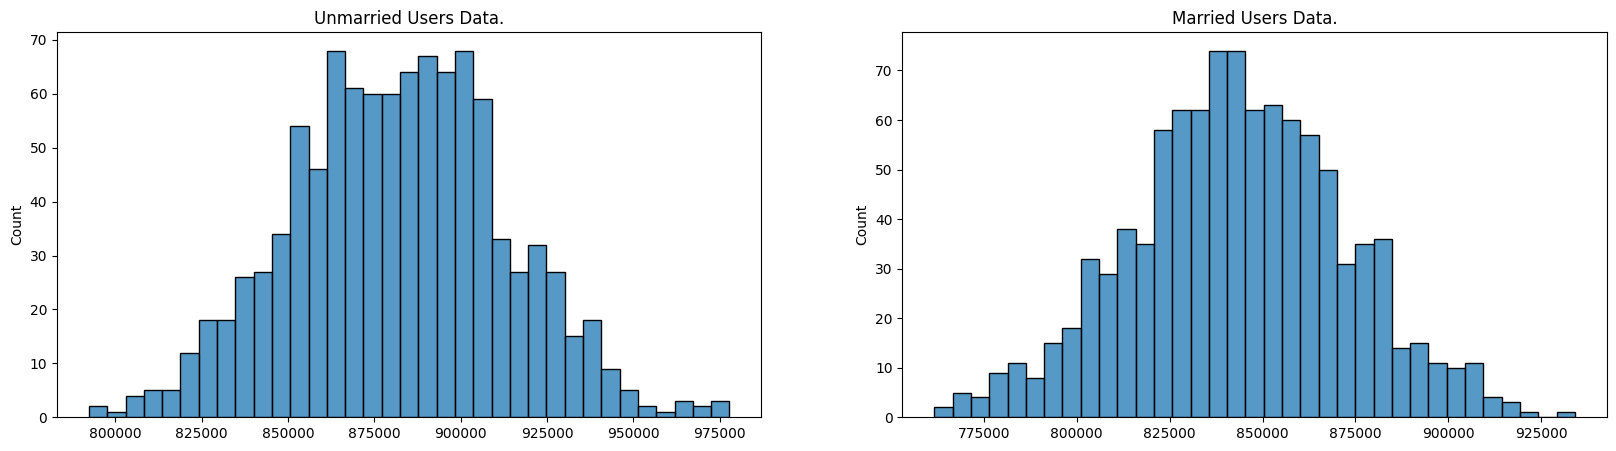

In [ ]:

fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

sns.histplot(unmarried_means,bins=35,ax=axis[0]).set_title("Unmarried Users Data.")
sns.histplot(married_means,bins=35,ax=axis[1]).set_title("Married Users Data.")

plt.show()


**Age Wise Confidence Interval**

In [ ]:
avgamt_age = df.groupby(['User_ID', 'Age'])[['Purchase']].sum()
avgamt_age = avgamt_age.reset_index()


In [ ]:
#No. of users in each age group
avgamt_age['Age'].value_counts()

26-35    2053
36-45    1167
18-25    1069
46-50     531
51-55     481
55+       372
0-17      218
Name: Age, dtype: int64

In [ ]:
#Sample

sample_size = 500
num_repitions = 1000
age_group = ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']
age_means = {}
unmarried_means = []

for j in age_group:
  age = avgamt_age[avgamt_age['Age']==j]
  age_means[j]=[]
  for i in range(num_repitions):
      avg_age = age.sample(sample_size, replace=True)['Purchase'].mean()
      age_means[j].append(avg_age)

In [ ]:
c1 = .95 # 95% confidence
c2 = .99 #99% confidence
c3 = .90 #90% confidence
age_groups = ['0-17','18-25', '26-35', '36-45', '46-50', '51-55', '55+']

for i in age_groups:
  age_mean=np.mean(age_means[i])
  age_sd=np.std(age_means[i])

  cim1= ci(c1,unmarried_sd,unmarried_mean)
  cim2= ci(c2,unmarried_sd,unmarried_mean)
  cim3= ci(c3,unmarried_sd,unmarried_mean)


  print("Conidence Interval for the Age Group ",i)
  print("If value belongs to interval [{:.2f},{:.2f}] it is in the 95% confidence Interval.".format(cim1[0],cim1[1]))
  print("If value belongs to interval [{:.2f},{:.2f}] it is in the 99% confidence Interval.".format(cim2[0],cim2[1]))
  print("If value belongs to interval [{:.2f},{:.2f}] it is in the 90% confidence Interval.".format(cim3[0],cim3[1]))

  print()
  print()

Conidence Interval for the Age Group  0-17
If value belongs to interval [879995.14,883078.81] it is in the 95% confidence Interval.
If value belongs to interval [879356.33,883717.62] it is in the 99% confidence Interval.
If value belongs to interval [880335.69,882738.26] it is in the 90% confidence Interval.


Conidence Interval for the Age Group  18-25
If value belongs to interval [879995.14,883078.81] it is in the 95% confidence Interval.
If value belongs to interval [879356.33,883717.62] it is in the 99% confidence Interval.
If value belongs to interval [880335.69,882738.26] it is in the 90% confidence Interval.


Conidence Interval for the Age Group  26-35
If value belongs to interval [879995.14,883078.81] it is in the 95% confidence Interval.
If value belongs to interval [879356.33,883717.62] it is in the 99% confidence Interval.
If value belongs to interval [880335.69,882738.26] it is in the 90% confidence Interval.


Conidence Interval for the Age Group  36-45
If value belongs t

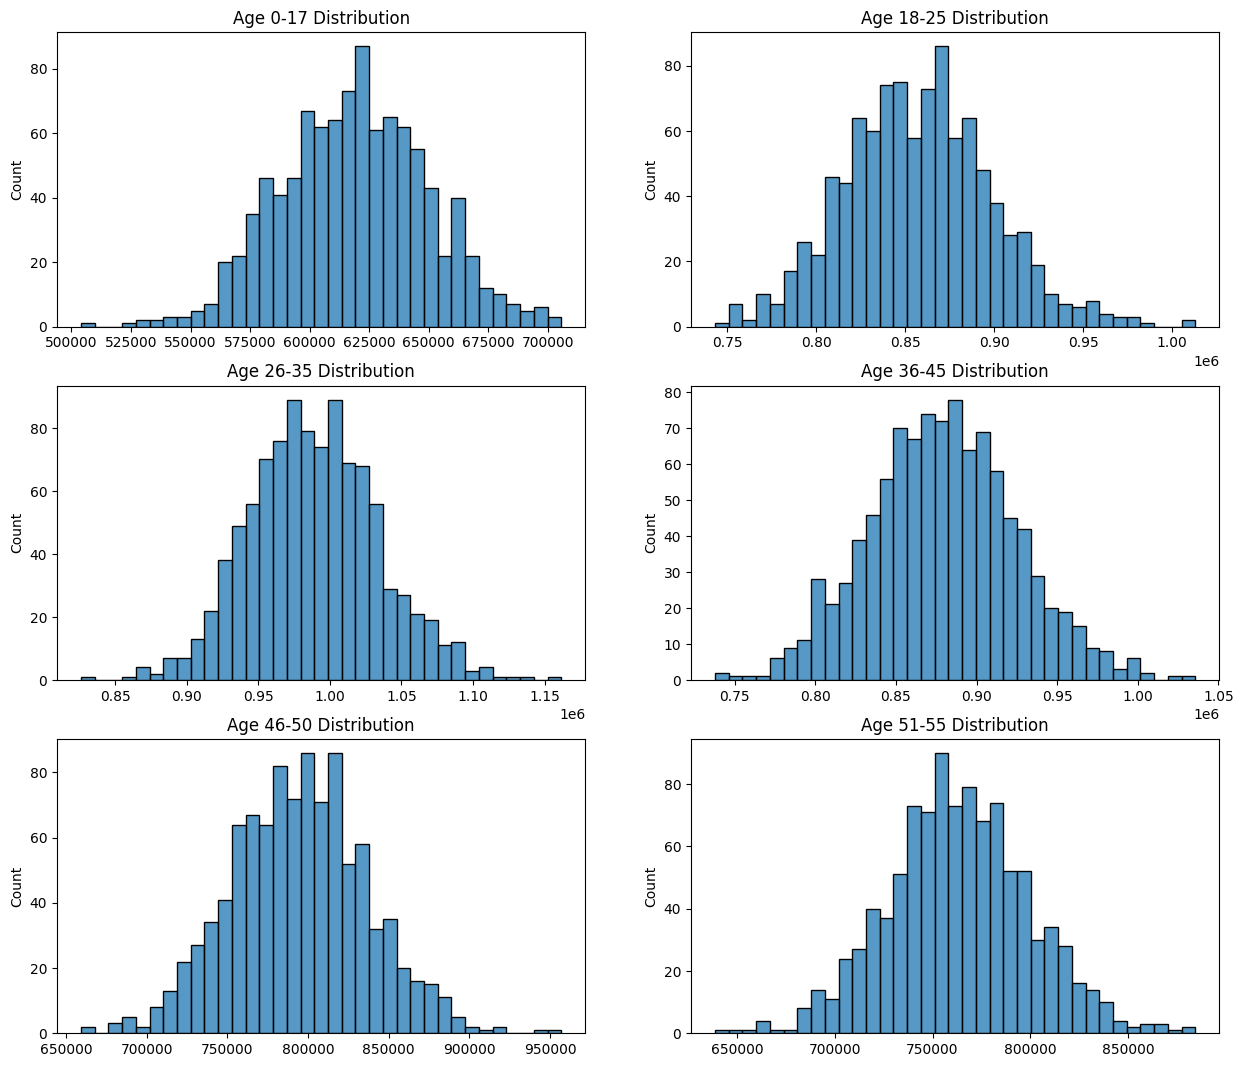

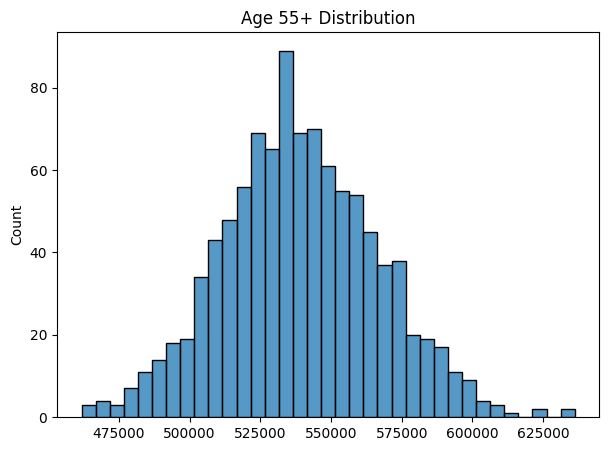

In [ ]:

all_sample_means = age_means

fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(15, 13))

sns.histplot(all_sample_means['0-17'],bins=35,ax=axis[0,0]).set_title("Age 0-17 Distribution")
sns.histplot(all_sample_means['18-25'],bins=35,ax=axis[0,1]).set_title("Age 18-25 Distribution")
sns.histplot(all_sample_means['26-35'],bins=35,ax=axis[1,0]).set_title("Age 26-35 Distribution")
sns.histplot(all_sample_means['36-45'],bins=35,ax=axis[1,1]).set_title("Age 36-45 Distribution")
sns.histplot(all_sample_means['46-50'],bins=35,ax=axis[2,0]).set_title("Age 46-50 Distribution")
sns.histplot(all_sample_means['51-55'],bins=35,ax=axis[2,1]).set_title("Age 51-55 Distribution")

plt.show()


plt.figure(figsize=(7, 5))
sns.histplot(all_sample_means['55+'],bins=35).set_title("Age 55+ Distribution")
plt.show()



In [ ]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

In [ ]:
df.groupby(['User_ID','Gender','City_Category'])['Purchase'].sum().reset_index()

,User_ID,Gender,City_Category,Purchase
0,1000001,F,A,334093
1,1000002,M,C,810472
2,1000003,M,A,341635
3,1000004,M,B,206468
4,1000005,M,A,821001
...,...,...,...,...
5886,1006036,F,B,4116058
5887,1006037,F,C,1119538
5888,1006038,F,C,90034
5889,1006039,F,B,590319


#Conclusions


---

    1. Men spent more money than women, company can focus on retaining the male customers and getting more male customers.
    
    2. Product_Category - 1, 5, 8 have highest purchasing frequency. it means these are the products in these categories are in more demand. Company can focus on selling more of these products.
    
    3. Unmarried customers spend more money than married customers, So company should focus on acquisition of Unmarried customers.
    
    4. Customers in the age 26-35 spend more money than the others, So company should focus on acquisition of customers who are in the age 26-35.
    
    5. We have more customers aged 26-35 in the city category B and A, company can focus more on these customers for these cities to increase the business.
    
    6. Male customers living in City_Category C spend more money than other male customers living in B or C, Selling more products in the City_Category C will help the company increase the revenue.
    
    7. Some of the Product category like 19,20,13 have very less purchase. Company can think of dropping it.
    
    8. The top 10 users who have purchased more company should give more offers and discounts so that they can be retained and can be helpful for companies business.
    
    9. The occupation which are contributing more company can think of offering credit cards or other benefits to those customers by liasing with some financial partners to increase the sales.
    
    10. The top products should be given focus in order to maintain the quality in order to further increase the sales of those products.
    
    11. People who are staying in city for an year have contributed to 35% of the total purchase amount. Company can focus on such customer base who are neither too old nor too new residents in the city.
    
    12. We have highest frequency of purchase order between 5k and 10k, company can focus more on these mid range products to increase the sales.

